In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [56]:
raw_data = pd.read_csv('yelp_labelled.txt', header = None, delimiter='\t')
raw_data.columns = ['review', 'rating']

In [57]:
raw_data.describe(include='all')

,review,rating
count,1000,1000.00000
unique,996,NaN
top,I won't be back.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


# Creating a Classifier

So in this model, we will be creating a classifier that can work through multiple instances of similar data. For our first example, we will be using data pulled from Yelp, including their review and either a positive or negative rating, where 1 means positive, and 0 means negative.

We've loaded our data and described it, seeing it's essentially split down the middle. Now the goal is to match exactly what differentiates a positive from a negative comment.

In [58]:
raw_data['review'].unique()

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a little slow in service.',

In [59]:
for item in raw_data['review']:
    item = item.lower()
    item = item.replace('.','')
    item = item.replace('!','')
    item = item.replace(',','')
    print(item)

wow loved this place
crust is not good
not tasty and the texture was just nasty
stopped by during the late may bank holiday off rick steve recommendation and loved it
the selection on the menu was great and so were the prices
now i am getting angry and i want my damn pho
honeslty it didn't taste that fresh)
the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer
the fries were great too
a great touch
service was very prompt
would not go back
the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced
i tried the cape cod ravoli chickenwith cranberrymmmm
i was disgusted because i was pretty sure that was human hair
i was shocked because no signs indicate cash only
highly recommended
waitress was a little slow in service
this place is not worth your time let alone vegas
did not like at all
the burrittos blah
the food amazing
service is also cute
i could care less the interior is just beautiful
s

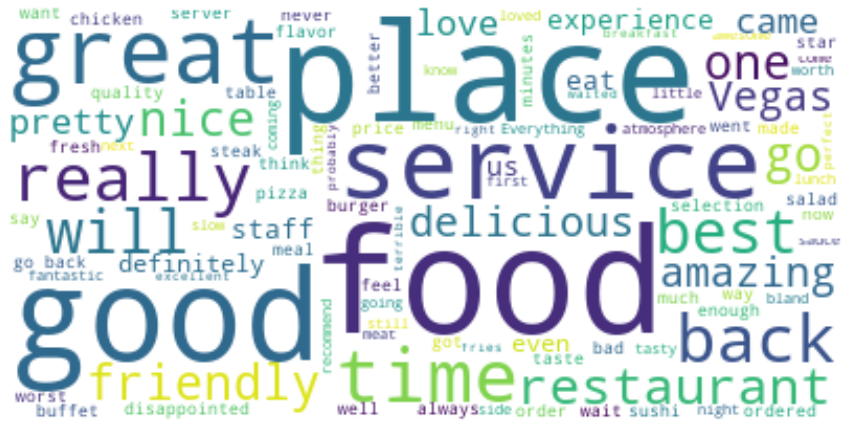

In [60]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='firebrick')

text = " ".join(review for review in raw_data.review)
wc.generate(text)

plt.figure(figsize=(15,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Here, running a quick word cloud, we can get a feel for what words are mostly said throughout these reviews, and we can use our better judgment to see which ones belong in either positive or negative categories. Some are ambiguous, though, so those we will overlook.

In [61]:
positive_keys = ['nice', 'great', 'good', 'best', 'fantastic', 'amazing', 'love', 'well', 'awesome','excellent', 'fresh', 'worth', 'quality', 'recommend','better']
negative_keys = ['bad', 'never', 'little', 'disappointed', 'worst', 'worse', 'poor','low','never', 'terrible', 'not']

In [62]:
for key in positive_keys:
    raw_data[str(key)] = raw_data.review.str.contains(str(key), case=False)
for key in negative_keys:
    raw_data[str(key)] = raw_data.review.str.contains(str(key), case=False)

In [63]:
positive_data = (raw_data[raw_data['rating']==1])
negative_data = (raw_data[raw_data['rating']==0])
positive_data.drop(columns=negative_keys,inplace=True)
negative_data.drop(columns=positive_keys,inplace=True)
positive_data.drop(columns='rating',inplace=True)
negative_data.drop(columns='rating',inplace=True)

c:\users\jcboy\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


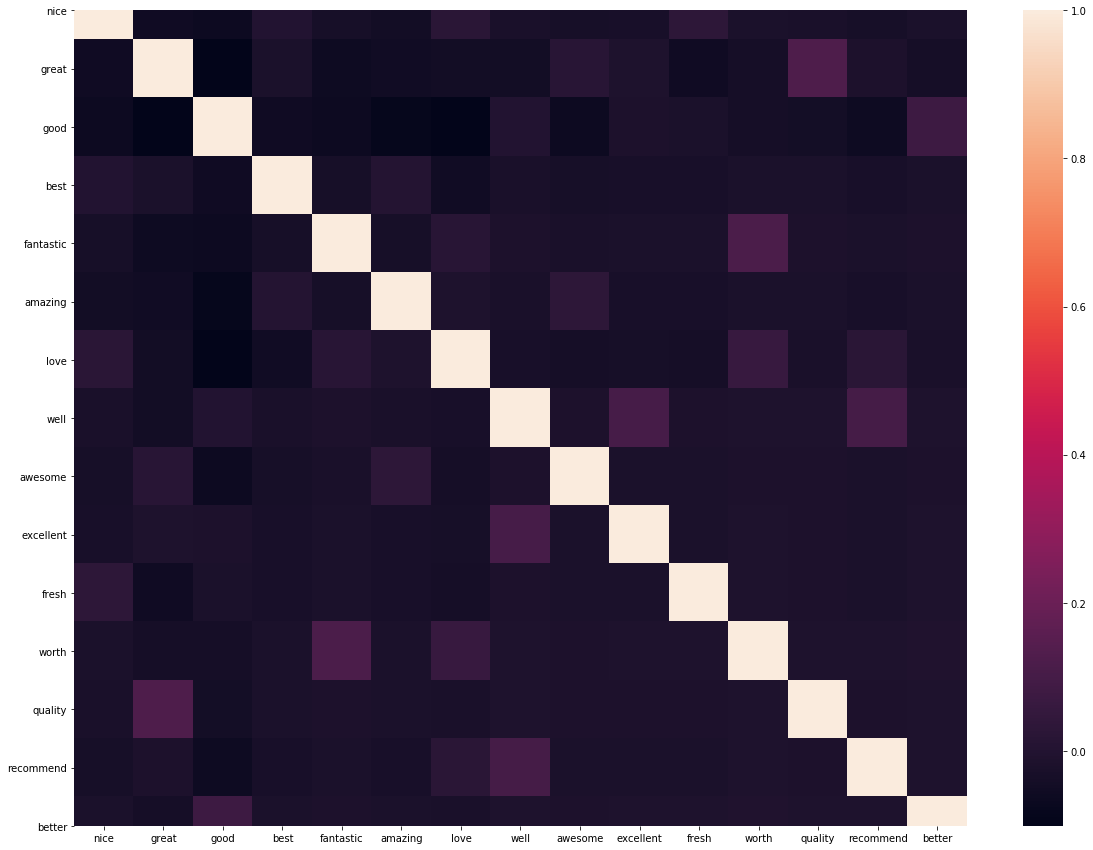

In [64]:
plt.figure(figsize = (20,15))
sns.heatmap(positive_data.corr())

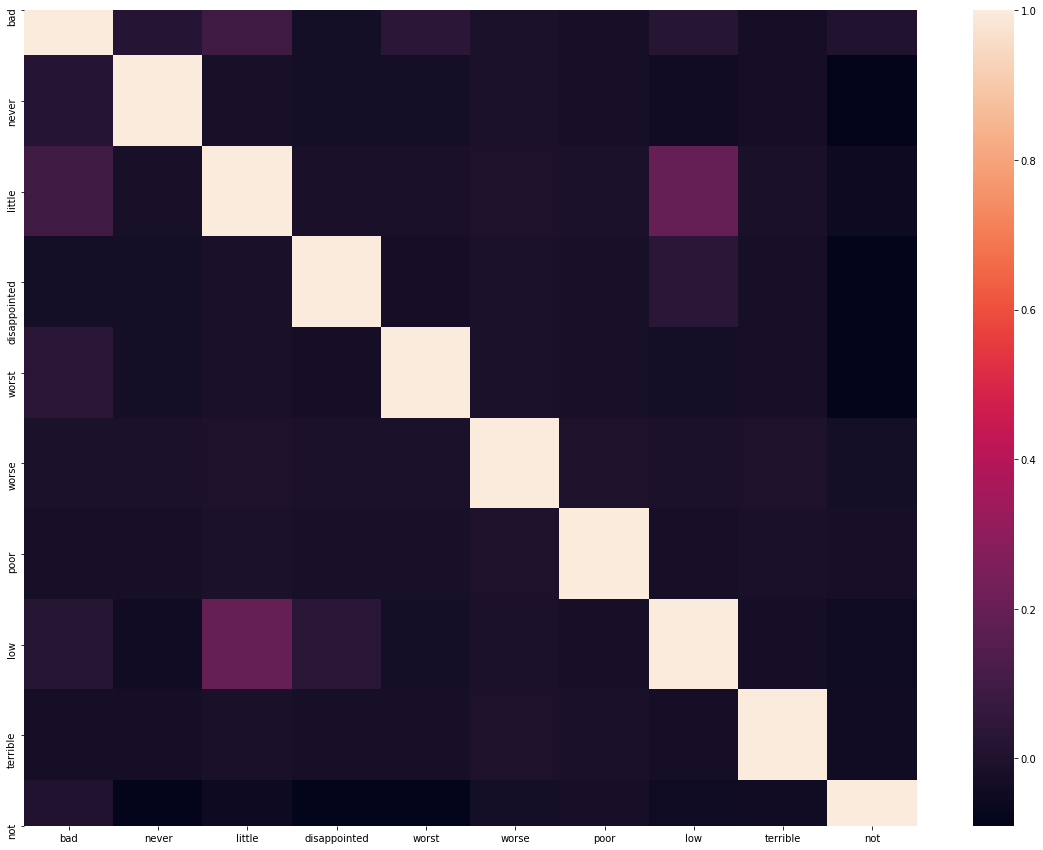

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(negative_data.corr())

In [66]:
data = raw_data[positive_keys]
target = raw_data['rating']

In [67]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 291


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[456,  44],
       [247, 253]], dtype=int64)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=25)

array([0.65 , 0.675, 0.75 , 0.8  , 0.65 , 0.725, 0.7  , 0.675, 0.775,
       0.775, 0.625, 0.75 , 0.65 , 0.6  , 0.65 , 0.75 , 0.7  , 0.7  ,
       0.625, 0.725, 0.7  , 0.675, 0.725, 0.8  , 0.725])

In [70]:
data = raw_data[negative_keys]
target = raw_data['rating']

In [71]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 335


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[200, 300],
       [ 35, 465]], dtype=int64)

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=25)

array([0.725, 0.65 , 0.625, 0.575, 0.675, 0.625, 0.775, 0.775, 0.575,
       0.625, 0.725, 0.675, 0.675, 0.675, 0.65 , 0.675, 0.775, 0.7  ,
       0.675, 0.675, 0.7  , 0.5  , 0.725, 0.6  , 0.575])